# Bisection Method

1. Start with two guesses on either side of the root, 
we'll call the guess to the left of the root a and the guess to the right of the root b.
2. Find the value of the function at the midpoint x between a and b.
3. Compare the signs of f(x) and f(a): if the signs are different, then the root
must be between a and x, so let b = x. If the signs are the same, then the
root must be between x and b, so let a = x.
4. Repeat this process until the distance between a and b is less than the desired tolerance
for your solution.

In [1]:
"""
This program uses the bisection method to find the root
of f(x) = exp (x)* ln(x) - x*x = 0.
"""
from math import * # math functions and constants

tolerance=1.0e-6 #solution tolerance.

#function definition to calculate the root
def f(x):
    f=exp(x)*log(x)-x*x
    return f

#Definition of a & b
root_positive, root_negative=-1, 1
while root_positive<0:
    a=eval(input("Enter guessess a (positive value for root):"))
    root_positive=f(a)
while root_negative>0:
    b=eval(input("Enter guessess b (negative value for function):"))
    root_negative=f(b)    
# a , b =eval(input("Enter two guessess, separated by commas:"))

dx = abs(b-a)  #Inital value of dx

##Bisection method
while dx>tolerance:
    x=(a+b)*0.5
    if(f(a)*f(x)<0):
        b=x
    else:
        a=x
    dx=abs(b-a)
    
print('Found f(x)=0 at x=%.8f +/- %0.8f' % (x, tolerance))
print("f(x)=",f(x))

Enter guessess a (positive value for root):3
Enter guessess b (negative value for function):1
Found f(x)=0 at x=1.69460011 +/- 0.00000100
f(x)= -2.1972592820773684e-06


In [2]:
from math import *
from resource import root_bisection as rb

theta0 = rb.root_bisection(cos, 0, pi)

print(theta0)
print(theta0*2)

print("\nExternal file bisection method:")
!type .\resource\root_bisection.py

1.5707963267948966
3.141592653589793

External file bisection method:
def root_bisection(f, a, b, tolerance=1.0e-6):
    """
    Uses the bisection method to find a value x between a and b
    for which f(x)=0 , to with in the tolerance given .
    Default tolerance is 1.0e-6, if no tolerenace is specified in
    the function call.
    """

    dx = abs(b-a)  #Inital value of dx

    ##Bisection method
    while dx>tolerance:
        x=(a+b)*0.5
        if(f(a)*f(x)<0):
            b=x
        else:
            a=x
        dx=abs(b-a)

        return x


# Problems
**2-0.** Write a generalized function implementing the secant method of root-
finding, similar to example 2.0.2.

**SOLUTION:** The secant method is similar to Newton method:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

but if we take the derivate definiton we have:
$$f'(x_n) = \lim_{x_{n-1} \rightarrow x_n}\frac{f(x_{n-1})-f(x_n)}{x_{n-1}-x_n}$$

but in this method we don't use the limit for the new iteration, then obtain the algorithmic to apply, the secant method

$$x_{n+1} = x_n - \frac{x_{n-1}-x_n}{f(x_{n-1})-f(x_n)} f(x_n)$$

in this case we don't need to know the derivate of function $f(x)$ to apply the method

In [3]:
print("Secant method of root  finding")
from math import * 

##Define secant method
def secant(f, xnm1, xn, tolerance=1.0e-6):
    while abs(xnm1-xn)>tolerance:
        print (xnm1,xn)
        xnm1,xn=xn,xn-((xn-xnm1)/(f(xn)-f(xnm1)))*f(xn)
    return xn
    
print("Probe function x^2=2")
def f(x):
    return x*x-2

root=secant(f, 0, 1)

print("The root of funtion is:", root)
print(root, root*root)

Secant method of root  finding
Probe function x^2=2
0 1
1 2.0
2.0 1.3333333333333335
1.3333333333333335 1.4000000000000001
1.4000000000000001 1.4146341463414633
1.4146341463414633 1.41421143847487
1.41421143847487 1.4142135620573204
The root of funtion is: 1.4142135623730954
1.4142135623730954 2.000000000000001


**2-1.** Write a program that uses the trapezoid method to return the integral
of a function over a given range, using a given number of sample points.
The actual calculation should be a function of the form int_trap(f ,dx),
where f is a list of function values and dx is the slice width.

**SOLUTION:** For apply the trapezoid method we use the approximation on the right part of relation , which is similar for the integral definition

$$\int_a^b f(x) dx \approx \sum_i^N \frac{f(x_i)+f(x_{i-1})}{2} \Delta x$$

Then for work with this method we only knows the points to evaluate $x_i$ and the form of the function $f(x)$ to deploy this method

In [4]:
print("Trapezoid method for integral calcuation")
from math import * 

##Trapezoid method
def int_trap(f, dx):
    int_sum=0.0
    for i in range(len(dx)):
#         print(i)
        int_sum=int_sum + (f[i]+f[i+1])*dx[i]/2
    return int_sum
    
###Definition of partition
n_partition=10
a=pi*0.5     #Initial point
b=pi   #Final point
x=[a+((b-a)*i/n_partition) for i in range(n_partition+1)] # x from pi/2 to pi
# x=[i*pi/n_partition for i in range(n_partition+1)] # x from 0 to pi/2
dx=[x[i+1]-x[i] for i in range(n_partition)]
print("x:", x)

###Definition for the function
def f(x):
    return sin(x)

fx=[f(x[i]) for i in range(n_partition+1)]

integral=int_trap(fx, dx)

print("The integral for function in range %f to %f is: %f" % (x[0], x[n_partition], integral))

Trapezoid method for integral calcuation
x: [1.5707963267948966, 1.7278759594743862, 1.8849555921538759, 2.0420352248333655, 2.199114857512855, 2.356194490192345, 2.5132741228718345, 2.670353755551324, 2.827433388230814, 2.9845130209103035, 3.141592653589793]
The integral for function in range 1.570796 to 3.141593 is: 0.997943


**2-2** Compare the results of the simple integration method, the trapezoid
integration method from problem 1, and Simpson's method of integration
for the following integrals:

* a) $$\int_0^{\pi/2} \cos(x) dx$$
* b) $$\int_1^3 \frac{1}{x^2} dx$$
* c) $$\int_2^4 (x^2+x+1) dx$$
* d) $$\int_0^{6.9} \cos \left(\frac{\pi}{2} x^2\right) dx$$

For each part, try it with more and with fewer slices to determine
how many slices are required to give an 'acceptable' answer. (If you
double the number of slices and still get the same answer, then try half
as many, etc. Parts (c) and (d) are particularly interesting in this
regard. In your submitted work, describe roughly how many points
were required, and explain.

Note: The function in (d) is the Fresnel Cosine Integral, used in optics.
It may be helpful in understanding what's going on with your
integration if you make a graph of the function. For more information
on this function, see [13].

**SOLUTION:** The using methods using are

*SIMPLE INTEGRAL METHOD*

$$\int_a^b f(x) dx \approx \sum_i f(x_i) \Delta x$$

*TRAPEZOID METHOD*
$$\int_a^b f(x) dx \approx \sum_i^N \frac{f(x_i)+f(x_{i-1})}{2} \Delta x$$

*SIMPSON METHOD*

$$\int_a^b f(x) dx \approx \frac{\Delta x}{3}\sum_{k=odd}^{N-1} (f(x_{k-1}) + 4f(x_{k})+f(x_{k+1}) ) $$
In simpson method we are restricted to use a even number of slices.

In first time we write the code of the methods in diferents functions

In [5]:
##Simple integral method
def simple(f, dx):
    int_sum=0.0
    for i in range(len(dx)):
        int_sum=int_sum + (f[i])*dx[i]
    return int_sum    

##Trapezoid method
def trapezoid(f, dx):
    int_sum=0.0
    for i in range(len(dx)):
        int_sum=int_sum + (f[i]+f[i+1])*dx[i]/2
    return int_sum

def simpson(f, dx):
    int_sum=0.0
    number_slices=len(dx)-1
    for i in range(1, number_slices, 2):
        int_sum=int_sum + (dx[i]/3)* (f[i-1] + 4*f[i]+ f[i+1])
    if number_slices%2==0:
        return int_sum
    else:
        last_slice=(dx[number_slices]/12)*(5*f[number_slices] + 8*f[number_slices-1]- f[number_slices-2]) 
        int_sum=int_sum+last_slice 
        return int_sum
    
    
from math import * 
import time

##########################################
###Definition partition function
# x from a to b with n_partition slices
def partition_function(a,b,n_partition):
    x=[a+((b-a)*i/n_partition) for i in range(n_partition+1)] 
    dx=[x[i+1]-x[i] for i in range(n_partition)]
#     print("x:", x)
    return x, dx

###Function for add an specified method
def integration_method(method, n_partition, name_method, a, b, true_value=0):
    t0=time.time()
    x, dx=partition_function(a, b, n_partition)
    fx=[f(x[i]) for i in range(n_partition+1)]

    integral=method(fx, dx)
    error=abs(integral-true_value)
    print("The integral for function in range %.3f to %.3f with %d slices for %s integral method is: %f" % 
          (x[0], x[n_partition], n_partition, name_method, integral))
    print("The error compared with the analitical solution is: %.8f" % error)
    print("Time spent in function %s integral method %.3f seconds. \n" % (name_method, time.time()-t0))

**a)** $$\int_0^{\pi/2} \cos(x) dx$$

The solution analitical is:

$$\int_0^{\pi/2} \cos(x) dx = \sin(x)\bigg|_0^{\pi/2} = \sin(\pi/2) - \sin(0) = 1-0$$

$$\int_0^{\pi/2} \cos(x) dx = 1$$


To deploy the methods we use $f(x)=\cos(x)$, and we use a number of slices to obtain an error less than an $10^{-6}$

In [6]:
###Definition for the function
def f(x):
    return cos(x)

analitical_solution=1.0

integration_method(simple, 1000000, 'simple', 0, pi/2, analitical_solution)
integration_method(trapezoid, 1000, 'trapezoid', 0, pi/2, analitical_solution)
integration_method(simpson, 20, 'simpson', 0, pi/2, analitical_solution)

The integral for function in range 0.000 to 1.571 with 1000000 slices for simple integral method is: 1.000001
The error compared with the analitical solution is: 0.00000079
Time spent in function simple integral method 1.566 seconds. 

The integral for function in range 0.000 to 1.571 with 1000 slices for trapezoid integral method is: 1.000000
The error compared with the analitical solution is: 0.00000021
Time spent in function trapezoid integral method 0.001 seconds. 

The integral for function in range 0.000 to 1.571 with 20 slices for simpson integral method is: 0.996919
The error compared with the analitical solution is: 0.00308089
Time spent in function simpson integral method 0.004 seconds. 



**b)** $$\int_1^3 \frac{1}{x^2} dx$$

The solution analitical is:

$$\int_1^3 \frac{1}{x^2} dx= \int_1^3 x^{-2} dx = \int_1^3 \frac{x^{-1}}{-1} dx = - \int_1^3 x^{-1} dx
= - x^{-1}\bigg|_1^3 = - 3^{-1} + 1^{-1} = 1 - \frac{1}{3}$$

$$\int_1^3 \frac{1}{x^2} dx = \frac{2}{3}$$


To deploy the methods we use $f(x)=\frac{1}{x^2}$, and we use a number of slices to obtain an error less than an $10^{-6}$

In [7]:
###Definition for the function
def f(x):
    return 1/(x*x)

analitical_solution=2/3

integration_method(simple, 1000000, 'simple', 1, 3, analitical_solution)
integration_method(trapezoid, 1000, 'trapezoid', 1, 3, analitical_solution)
integration_method(simpson, 50, 'simpson', 1, 3, analitical_solution)

The integral for function in range 1.000 to 3.000 with 1000000 slices for simple integral method is: 0.666668
The error compared with the analitical solution is: 0.00000089
Time spent in function simple integral method 1.505 seconds. 

The integral for function in range 1.000 to 3.000 with 1000 slices for trapezoid integral method is: 0.666667
The error compared with the analitical solution is: 0.00000064
Time spent in function trapezoid integral method 0.003 seconds. 

The integral for function in range 1.000 to 3.000 with 50 slices for simpson integral method is: 0.662162
The error compared with the analitical solution is: 0.00450418
Time spent in function simpson integral method 0.000 seconds. 



**c)** $$\int_2^4 (x^2+x+1) dx$$

The solution analitical is:

$$\int_2^4 (x^2+x+1) dx = \left(\frac{x^3}{3} + \frac{x^2}{2} + x \right) \bigg|_2^4 = 
\left(\frac{4^3}{3} + \frac{4^2}{2} + 4 \right) - \left(\frac{2^3}{3} + \frac{2^2}{2} + 2 \right)=
\left(\frac{64}{3} + \frac{24}{3} + \frac{12}{3} \right) - \left(\frac{8}{3} + \frac{6}{3} + \frac{6}{3} \right)$$

$$\int_2^4 (x^2+x+1) dx = \frac{80}{3}$$


To deploy the methods we use $f(x)=(x^2+x+1)$, and we use a number of slices to obtain an error less than an $10^{-6}$

In [8]:
###Definition for the function
def f(x):
    return x*x + x + 1

analitical_solution=80/3

integration_method(simple, 20000000, 'simple', 2, 4, analitical_solution)
integration_method(trapezoid, 10000, 'trapezoid', 2, 4, analitical_solution)
integration_method(simpson, 10, 'simpson', 2, 4, analitical_solution)

The integral for function in range 2.000 to 4.000 with 20000000 slices for simple integral method is: 26.666666
The error compared with the analitical solution is: 0.00000070
Time spent in function simple integral method 32.655 seconds. 

The integral for function in range 2.000 to 4.000 with 10000 slices for trapezoid integral method is: 26.666667
The error compared with the analitical solution is: 0.00000001
Time spent in function trapezoid integral method 0.024 seconds. 

The integral for function in range 2.000 to 4.000 with 10 slices for simpson integral method is: 22.644000
The error compared with the analitical solution is: 4.02266667
Time spent in function simpson integral method 0.004 seconds. 



**d)** $$\int_0^{6.9} \cos \left(\frac{\pi}{2} x^2\right) dx$$

I don't find an analitical solution, but according Wolfram Alpha $\int_0^{6.9} \cos \left(\frac{\pi}{2} x^2\right) dx = 0.473225$

To deploy the methods we use $f(x)=\cos \left(\frac{\pi}{2} x^2\right)$, and we use a number of slices to obtain an error less than an $10^{-6}$

In [9]:
###Definition for the function
def f(x):
    return cos(pi*x*x /2)

analitical_solution=0.473225

integration_method(simple, 1000000, 'simple', 0, 6.9, analitical_solution)
integration_method(trapezoid, 10000, 'trapezoid', 0, 6.9, analitical_solution)
integration_method(simpson, 1000, 'simpson', 0, 6.9, analitical_solution)

The integral for function in range 0.000 to 6.900 with 1000000 slices for simple integral method is: 0.473226
The error compared with the analitical solution is: 0.00000094
Time spent in function simple integral method 2.037 seconds. 

The integral for function in range 0.000 to 6.900 with 10000 slices for trapezoid integral method is: 0.473226
The error compared with the analitical solution is: 0.00000081
Time spent in function trapezoid integral method 0.036 seconds. 

The integral for function in range 0.000 to 6.900 with 1000 slices for simpson integral method is: 0.467896
The error compared with the analitical solution is: 0.00532870
Time spent in function simpson integral method 0.004 seconds. 



**2-3** Show that equation 2.12 is correct.

**SOLUTION:** The equation 2.12 of the book is
$$A_{last \space slice} = \frac{\Delta x}{12} (5 f(N) + 8 f(N-1) - f(N-2))$$

To find the solution of the last slice we have to approximate the last slice to the equation of parabola which goes through the three points for last points in the sample $x_{N}, x_{N-1}, x_{N-2}$, 

$$x_{N-2}=a \quad x_{N-1}=m \quad and \quad x_N=b 
\qquad
(Definition \space 1)$$

And we know that $m$ is the media point between $a$ and $b$

$$m = \frac{a+b}{2}
\qquad
(Definition \space 2)$$

And for defintion (2) we have the next relation, which is useful for next replace
$$\Delta x = m-a = b-m = \frac{b-a}{2} 
\qquad
(Definition \space 3)$$

The equation for a parabola takes this form 

$$g_{last \space slice}(x) = f(a) \frac{(x-m)(x-b)}{(a-m)(a-b)} +
f(m) \frac{(x-a)(x-b)}{(m-a)(m-b)} +
f(b) \frac{(x-m)(x-a)}{(b-m)(b-a)}$$

And we must integrate the function $g_{last \space slice}(x)$ between $x_{N-1}$ and $x_N$,

In first time we have:

$$\int_{m}^{b} f(a) \frac{(x-m)(x-b)}{(a-m)(a-b)} dx = 
\frac{f(a)}{(a-m)(a-b)} \int_{m}^{b} (x-m)(x-b) dx
\qquad (Equation \space 1)$$

And the last integral 

$$\int_{m}^{b} (x-m)(x-b) dx = \int_{m}^{b} (x^2 - (m+b)x + mb) dx = 
\left[\frac{x^3}{3} - \frac{(m+b) x^2}{2} +mbx \right]_{m}^{b} = 
\frac{b^3 - m^3}{3} - \frac{(m+b) (b^2-m^2)}{2} +mb(b-m)$$
$$=\frac{b-m}{6} [2(b^2 + bm + m^2) - 3(m+b)(b+m) + 6mb]$$
$$=\frac{b-m}{6} [2b^2 + 2bm + 2m^2 - 3m^2 -6mb- 3b^2  + 6mb]$$
$$=\frac{b-m}{6} [2bm -m^2- b^2] = \frac{b-m}{6} [-(b-m)^2]$$

Then

$$\int_{m}^{b} f(a) \frac{(x-m)(x-b)}{(a-m)(a-b)} dx = \frac{f(a)}{(a-m)(a-b)} \frac{b-m}{6} [-(b-m)^2]$$

And we have $(b-m) = (m-a) = (b-a)/2$ for Definition (2)

$$\int_{m}^{b} f(a) \frac{(x-m)(x-b)}{(a-m)(a-b)} dx = \frac{f(a)}{[-(b-m)][-2(b-m)]} \frac{b-m}{6} [-(b-m)^2] =
\frac{f(a)}{2(b-m)^2} \frac{b-m}{6} [-(b-m)^2]$$
$$\int_{m}^{b} f(a) \frac{(x-m)(x-b)}{(a-m)(a-b)} dx = \frac{b-m}{12} f(a) (-1) \qquad (Equation \space 1)$$

The second integral is

$$\int_{m}^{b} f(m) \frac{(x-a)(x-b)}{(m-a)(m-b)} dx = 
\frac{f(m)}{(m-a)(m-b)} \int_{m}^{b} (x-a)(x-b) dx \qquad (Equation \space 2)$$

$$\int_{m}^{b} (x-a)(x-b) = \int_{m}^{b} (x^2 - (a+b)x + ab) dx = 
\left[\frac{x^3}{3} - \frac{(a+b) x^2}{2} +mbx \right]_{m}^{b} = 
\frac{b^3 - m^3}{3} - \frac{(m+b) (b^2-m^2)}{2} +ab(b-m)$$
$$=\frac{b-m}{6} [2(b^2 + bm + m^2) - 3(a+b)(b+m) + 6ab]$$
$$=\frac{b-m}{6} [2b^2 + 2bm + 2m^2 - 3ab -3am- 3b^2 -3bm  + 6ab]$$
$$=\frac{b-m}{6} [2m^2 - 3am - b^2 -bm +3ab] = \frac{b-m}{6} [(m-b)(2(m-b)+3(b-a))]$$

If $(m-a) = -(m-b)$ and $(b-a)=2(m-a)$ for Definition (2), then

$$\int_{m}^{b} f(m) \frac{(x-a)(x-b)}{(m-a)(m-b)} dx = 
\frac{f(m)}{(m-a)(m-b)}  \frac{b-m}{6} [(m-b)(2(m-b)+3(b-a))]$$
$$= \frac{f(m)}{(m-a)(m-b)}  \frac{b-m}{6} [(m-b)(-2(m-a)+6(m-a))]$$
$$= \frac{f(m)}{(m-a)(m-b)}  \frac{b-m}{6} [4(m-b)(m-a)]$$

$$\int_{m}^{b} f(m) \frac{(x-a)(x-b)}{(m-a)(m-b)} dx = 
\frac{b-m}{12} f(m) (8) \qquad (Equation \space 2)$$

The third integral is

$$\int_{m}^{b} f(b) \frac{(x-m)(x-a)}{(b-m)(b-a)} dx = 
\frac{f(m)}{(b-m)(b-a)} \int_{m}^{b} (x-m)(x-a) dx \qquad (Equation \space 3)$$

$$\int_{m}^{b} (x-m)(x-a) = \int_{m}^{b} (x^2 - (m+a)x + ma) dx = 
\left[\frac{x^3}{3} - \frac{(m+a) x^2}{2} +max \right]_{m}^{b} = 
\frac{b^3 - m^3}{3} - \frac{(m+a) (b^2-m^2)}{2} +ma(b-m)$$
$$=\frac{b-m}{6} [2(b^2 + bm + m^2) - 3(m+a)(b+m) + 6ma]$$
$$=\frac{b-m}{6} [2b^2 + 2bm + 2m^2 - 3mb -3m^2- 3ab -3am  + 6ma]$$
$$=\frac{b-m}{6} [2b^2 - bm - m^2- 3ab + 3ma] = \frac{b-m}{6} [(b-m)(2(b-a)+(m-a))]$$

If $(b-a)/2=(m-a)$ for Definition (2), then

$$=\frac{b-m}{6} [2b^2 - bm - m^2- 3ab + 3ma] = \frac{b-m}{6} \left[(b-m)\left(2(b-a)+\frac{(b-a)}{2}\right)\right]$$

$$= \frac{b-m}{6} \left[(b-m)\left(\frac{5(b-a)}{2}\right)\right] = 
\frac{b-m}{12} (5)(b-m) (b-a)$$

The last integral is

$$\int_{m}^{b} f(b) \frac{(x-m)(x-a)}{(b-m)(b-a)} dx = 
\frac{b-m}{12} f(b) (5) \qquad (Equation \space 3)$$

And we make the replaces of $(Equation \space 1)$, $(Equation \space 2)$ and $(Equation \space 3)$

$$A_{last \space slice} = \int_m^b g_{last \space slice}(x) dx = \frac{b-m}{12} ((-1)f(a)+ 8f(b)+ 5 f(m))$$

And replace the values in $(Definition \space 1)$ and $(Definition \space 3)$ we obtain the equation 2.12 of the book.

**2-4** Write a program that can calculate double integrals. Use the simple
method, but instead of using rectangular slices use square prisms with
volume $f(x,y) \Delta x \Delta y$. Check your program by using it to calculate the
volume of a hemisphere.

In [10]:
print("Method for double integral calcuation")
from math import * 
import time

def double_integral(f, dx, dy):
    int_sum=0.0
    for i in range(len(dx)):
        for j in range(len(dy)):
#             print(i,j,f[i][j])
            int_sum=int_sum + (f[i][j])*dx[i]*dy[i]
    return int_sum  

def double_partition_function(xi,xf,yi,yf,n_partition):
    x=[xi+((xf-xi)*i/n_partition) for i in range(n_partition+1)] 
    dx=[x[i+1]-x[i] for i in range(n_partition)]
    
    y=[yi+((yf-yi)*i/n_partition) for i in range(n_partition+1)] 
    dy=[y[i+1]-y[i] for i in range(n_partition)]
#     print("x:", x)
    return x, y, dx, dy

###Hemisphere function ratio 1
def f(x,y):
    ratio=1
    if(x*x + y*y<ratio):
        return sqrt(ratio- x*x - y*y)
    else:
        return 0

n_partition=3000
limit=1.0
true_value= 2*pi/3
name_method='double x-y'

t0=time.time()
x, y, dx, dy=double_partition_function(-limit, limit, -limit, limit, n_partition)
f=[[f(x[i], y[j]) for i in range(n_partition+1)] for j in range(n_partition+1)]


integral=double_integral(f, dx, dy)
error=abs(integral-true_value)
print("The integral for function in range %.3f to %.3f with %d slices for %s integral method is: %f" % 
      (x[0], x[n_partition], n_partition, name_method, integral))
print("The error compared with the analitical solution is: %.8f" % error)
print("Time spent in function %s integral method %.3f seconds. \n" % (name_method, time.time()-t0))

Method for double integral calcuation
The integral for function in range -1.000 to 1.000 with 3000 slices for double x-y integral method is: 2.094395
The error compared with the analitical solution is: 0.00000037
Time spent in function double x-y integral method 12.982 seconds. 



**2-5** The Simpson's method program developed in this chapter requires
uniform slice width. It's sometimes convenient to integrate using slices
of varying width, for example if one needs to integrate data sets that
are taken at irregular time intervals. Write a Simpson's method routine
that integrates over non-constant-width slices. The routine should
take two arrays as its arguments: the first array should be an array should be an array of
function values f(x), and the second an array of values of x.

**SOLUTION:** In the section *2-2* we develop a program which uses a the before features, and we rewrite this function to next:

In [11]:
def simpson(f, dx):
    int_sum=0.0
    number_slices=len(dx)-1
    for i in range(1, number_slices, 2):
        int_sum=int_sum + (dx[i]/3)* (f[i-1] + 4*f[i]+ f[i+1])
    if number_slices%2==0:
        return int_sum
    else:
        last_slice=(dx[number_slices]/12)*(5*f[number_slices] + 8*f[number_slices-1]- f[number_slices-2]) 
        int_sum=int_sum+last_slice 
        return int_sum

**2-6** The Fermi-Dirac distribution describes the probability of finding a
quantum particle with half-integer spin $(\frac{1}{2},\frac{3}{2},...)$ in energy state E:

$$f_{FD} = \frac{1}{e^{(E-\mu)/\kappa T} + 1}$$

The $\mu$ in the Fermi-Dirac distribution is called the Fermi energy, and
in this case we want to adjust $\mu$ so that the total probability of finding
the particle somewhere is exactly one.

$$\int_{E_{min}}^{E_{max}} f_{FD} dE =1$$

Imagine a room-temperature quantum system where for some reason
the energy E is constrained to be between 0 and 2 eV. What is $\mu$ in
this case? At room temperature, $\kappa T \approx \frac{1}{40} eV$. Feel free to use any
of the integration and/or root-finding routines you've learned in this
chapter.

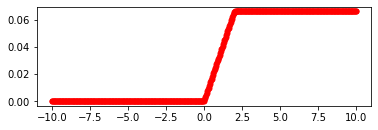

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from math import * 

##Define secant method
def secant(f, xnm1, xn, tolerance=1.0e-6):
    while abs(xnm1-xn)>tolerance:
        print (xnm1,xn)
        xnm1,xn=xn,xn-((xn-xnm1)/(f(xn)-f(xnm1)))*f(xn)
    return xn


#Define variables (energies and temperature)
Emin, Emax, KT = 0 , 2, 1/40

###Definition of partition
n_partition=100
a=Emin     #Initial point
b=Emax   #Final point
E=[a+((b-a)*i/n_partition) for i in range(n_partition+1)] # x from 0 to 2
dE=[x[i+1]-x[i] for i in range(n_partition)]
# print("E:", E)

def ffd(E, mu):
    return 1/(np.exp((E-mu)/KT) + 1)

# mu=0
mu = np.linspace(-10, 10, 500)
fE=[ffd(E[i], mu) for i in range(n_partition+1)]
# print("ffd:", fE)

fermi_integral=simpson(fE, dE)
root=fermi_integral-1
# print(fermi_integral)
# print(root)

##Plot scale y
fig=plt.figure()
ax2=fig.add_subplot(2, 1, 1)
plt.plot(mu, fermi_integral, 'ro', markersize=5)

# root=secant(f, 0, 1)